In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc


In [2]:
from timeseries_graph_functions import *

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [4]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [6]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [7]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 2. 의류 

In [8]:
clothes_raw = raw_data[raw_data['상품군'] == '의류']

In [9]:
clothes_raw

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35305,38227,2019-12-31 10:40:00,20.00,100269,200885,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,의류,299000,59435000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,235.81,199
35306,38228,2019-12-31 11:00:00,20.00,100269,200885,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,의류,299000,84192000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,255.15,282
35337,38260,2019-12-31 18:20:00,20.00,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,31983000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,204.90,405
35338,38261,2019-12-31 18:40:00,20.00,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,39434000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,214.87,499


In [10]:
clothes_raw.info

<bound method DataFrame.info of        Unnamed: 0                방송일시  노출(분)    마더코드    상품코드  \
0               1 2019-01-01 06:00:00  20.00  100346  201072   
1               2 2019-01-01 06:00:00  20.00  100346  201079   
2               3 2019-01-01 06:20:00  20.00  100346  201072   
3               4 2019-01-01 06:20:00  20.00  100346  201079   
4               5 2019-01-01 06:40:00  20.00  100346  201072   
...           ...                 ...    ...     ...     ...   
35305       38227 2019-12-31 10:40:00  20.00  100269  200885   
35306       38228 2019-12-31 11:00:00  20.00  100269  200885   
35337       38260 2019-12-31 18:20:00  20.00  100356  201134   
35338       38261 2019-12-31 18:40:00  20.00  100356  201134   
35339       38262 2019-12-31 19:00:00  20.00  100356  201134   

                          상품명 상품군    판매단가        취급액        날짜  ...   월   일  \
0               테이트 남성 셀린니트3종  의류   39900    2099000  20190101  ...   1   1   
1               테이트 여성 셀린니트3종  의류   39900

# 1-0. 시계열 (월별, 시간대별 )

In [11]:
def sales_by_month(data):
    sales_per_month = pd.DataFrame(data, columns = ("월","취급액"))
    sales_per_month_group = sales_per_month.groupby("월")
    
    sales_per_month_group_SUM= sales_per_month_group.sum()
    sales_per_month_group_MEAN=  sales_per_month_group.mean() 
    
    sales_per_month_group_SUM.plot()
    plt.title("월별 취급액 합계")
    plt.xticks(np.arange(1,13,1))

    sales_per_month_group_MEAN.plot()
    plt.title("월별 취급액 평균")
    plt.xticks(np.arange(1,13,1))

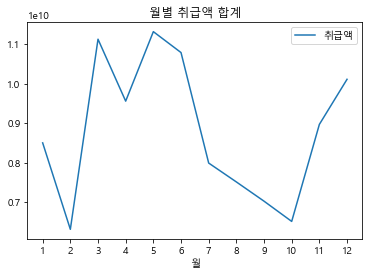

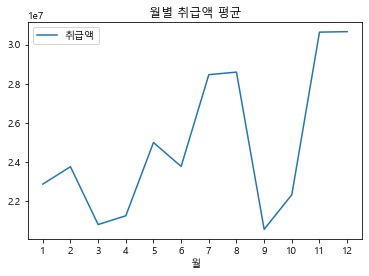

In [12]:
sales_by_month(clothes_raw)

# 시간대별 취급액 총합 / 평균

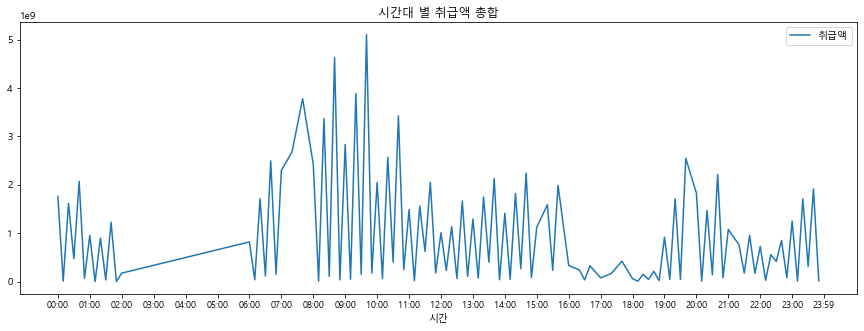

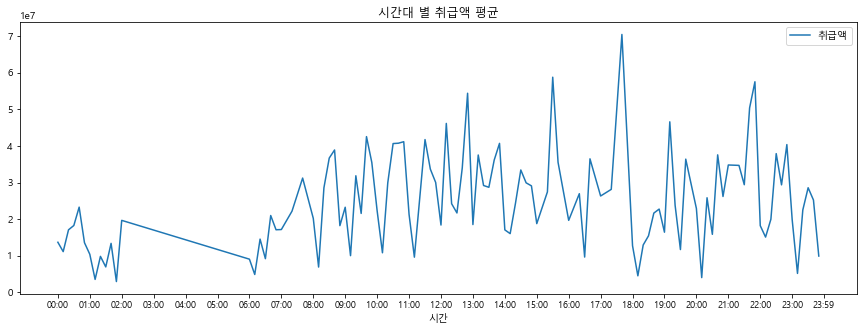

In [13]:
sales_by_time(clothes_raw)

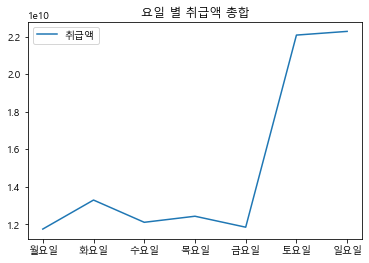

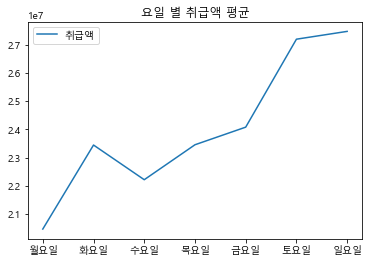

In [14]:
sales_by_yoill(clothes_raw)

# 계절별 취급액 총액 / 평균 

In [15]:
# sns.set(rc = {"figure.figsize": (14,6)})
# flierprops = dict(marker = 'o', markersize = 5)
# sns.boxplot(x = '계절', y='취급액',  data = sales_by_season, flierprops = flierprops)
# plt.show()

In [16]:
def sales_by_season(data):
    sales_season = pd.DataFrame(clothes_raw, columns =['취급액','계절'])
    group_season = sales_season.groupby(['계절'])
    
    season_sum = group_season.sum()
    season_mean = group_season.mean()
    
    season_sum_sort = pd.DataFrame(season_sum, ("봄","여름","가을","겨울"))
    season_mean_sort = pd.DataFrame(season_mean, ("봄","여름","가을","겨울"))
    
    print(season_sum_sort.plot.bar())
    print(plt.title("계절 별 취급액 총합"))

    print(season_mean_sort.plot.bar())
    print(plt.title("계절 별 취급액 평균"))


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


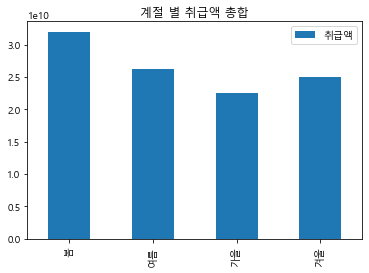

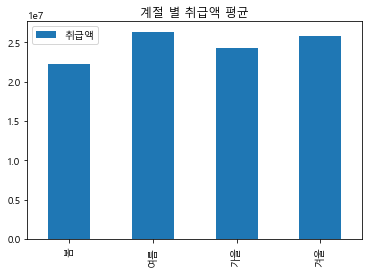

In [17]:
sales_by_season(clothes_raw)

# 계절별 매진 여부 

In [18]:
def soldout_by_season(data):                
    soldout_by_season = pd.DataFrame(data, columns =['매진여부','계절'])
    group_soldout = soldout_by_season.groupby(['계절'])
    print(group_soldout.sum())  

In [19]:
soldout_by_season(clothes_raw)

    매진여부
계절      
가을     3
겨울     4
봄      1
여름     0


# 계절별 판매단가 평균

In [20]:
def unitprice_by_season(data):
    uprice_by_season =  pd.DataFrame(data, columns = ['판매단가','계절'])
    uprice_group_season = uprice_by_season.groupby("계절")
    
    sum_group = uprice_group_season.sum()
    mean_group = uprice_group_season.mean()
    
    sum_group_sort = pd.DataFrame(sum_group, ("봄", "여름","가을","겨울"))   # 계절 순서 조정
    mean_group_sort = pd.DataFrame(mean_group, ("봄", "여름","가을","겨울"))   # 계절 순서 조정
    
    print(sum_group_sort.plot.bar())
    print(plt.title("계절별 판매단가 총액"))

    print(mean_group_sort.plot.bar())
    print(plt.title("계절별 판매단가 평균"))
    

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


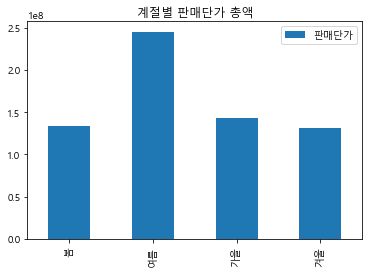

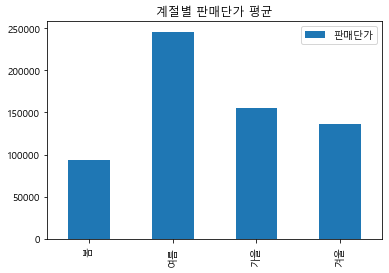

In [21]:
unitprice_by_season(clothes_raw)

# 계절별 상품명 수  (보류) 


# 계절별 최소판매수량 총합 / 평균


In [22]:
def quantity_by_season(data):
    quantity_season =  pd.DataFrame(data, columns = ["계절","최소판매수량"])
    quantity_season_group = quantity_season.groupby("계절")
    
    quantity_group_sum  = quantity_season_group.sum()   # 데이터프레임 
    quantity_group_mean = quantity_season_group.mean()
    
    df_quantity_groupSUM = pd.DataFrame(quantity_group_sum, ("봄","여름","가을","겨울"))
    df_quantity_groupMEAN = pd.DataFrame(quantity_group_mean, ("봄","여름","가을","겨울"))
    
    df_quantity_groupSUM.plot.bar()
    plt.title("계절별 최소판매수량 합계")

    df_quantity_groupMEAN.plot.bar()
    plt.title("계절별 최소판매수량 평균")

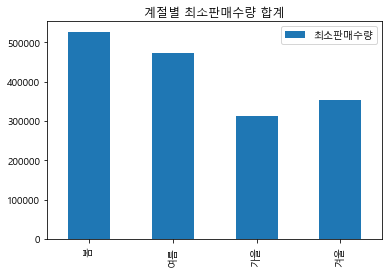

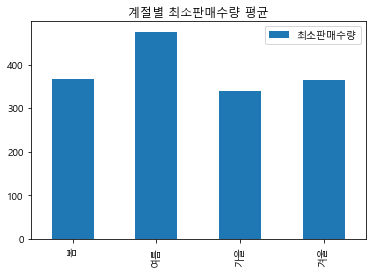

In [23]:
quantity_by_season(clothes_raw)

# 1-2. 분기 

# 분기별 취급액 총액/평균 

In [24]:
def sales_by_Q(data):
    sales_Q = pd.DataFrame(data, columns = ("분기", "취급액")  )
    sales_by_Q_group = sales_Q.groupby("분기")
    
    Q_group_sum  = sales_by_Q_group.sum()
    Q_group_mean = sales_by_Q_group.mean()
    
    Q_group_sum.plot.bar()
    plt.title("분기별 취급액 총합")
    Q_group_mean.plot.bar()
    plt.title("분기별 취급액 평균")
    

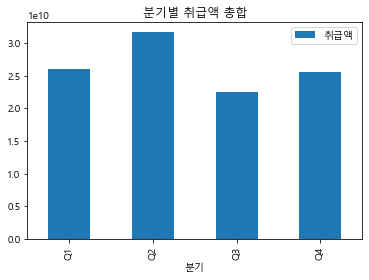

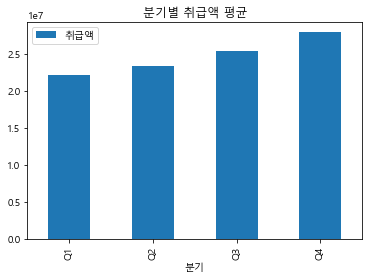

In [25]:
sales_by_Q(clothes_raw)

# 분기별 매진 여부 : (생략)

# 분기별 판매단가 평균

In [26]:
def unitprice_by_Q(data):
    unitprice_Q =  pd.DataFrame(data, columns = ['판매단가','분기'])
    unitprice_by_Q_season = unitprice_Q.groupby("분기")
    unitprice_by_Q_MEAN= unitprice_by_Q_season.mean()

    unitprice_by_Q_MEAN.plot.bar()
    plt.title("분기별 판매 단가 평균")

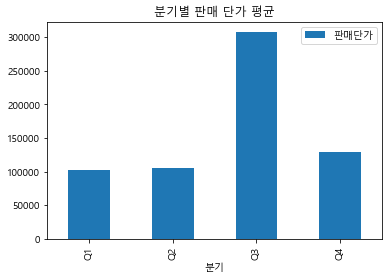

In [27]:
unitprice_by_Q(clothes_raw)

# 분기별 최소판매수량 총합 / 평균

In [28]:
def quantity_by_Q(data): 
    quantity_Q =  pd.DataFrame(data, columns = ["분기","최소판매수량"])
    quantity_Q_group = quantity_Q.groupby("분기")
    
    quantity_Q_group_sum  = quantity_Q_group.sum()   # 데이터프레임 
    quantity_Q_group_mean = quantity_Q_group.mean()
    
    quantity_Q_group_sum.plot.bar()
    plt.title("분기별 최소판매수량 합계")
    quantity_Q_group_mean.plot.bar()
    plt.title("분기별 최소판매수량 평균")

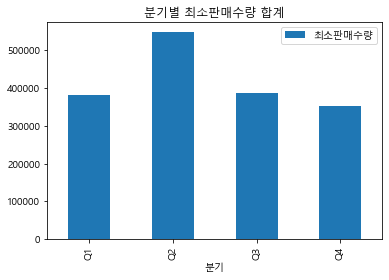

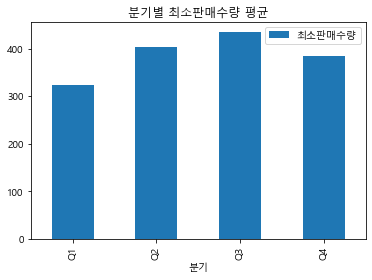

In [29]:
quantity_by_Q(clothes_raw)